In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [51]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import normaltest

In [3]:
plt.style.use('default')

In [37]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv" , sep=",")

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print("Počet duplikátov: ", data.duplicated().sum())

Počet duplikátov:  0


In [7]:
#Zmena kategorických dát na kategórie
data['anaemia'] = data['anaemia'].astype('category')
data['diabetes'] = data['diabetes'].astype('category')
data['high_blood_pressure'] = data['high_blood_pressure'].astype('category')
data['smoking'] = data['smoking'].astype('category')
data['sex'] = data['sex'].astype('category')
data['DEATH_EVENT'] = data['DEATH_EVENT'].astype('category')
nekategoricke = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

In [9]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [10]:
data[nekategoricke].mode()

,creatinine_phosphokinase,platelets,ejection_fraction,serum_sodium,serum_creatinine,time,age
0,582.0,263358.03,35.0,136.0,1.0,187,60.0
1,NaN,NaN,NaN,NaN,NaN,250,NaN


In [11]:
#Z popisu vyšie, vieme zistiť:
# Väčšina pacientov má 60 rokov
# Bola kardiovaskulárnym pacientom 187 až 250 dní
# Mali 1 mg/dL kreatinínu v krvi
# Mali 136mEg/L sodíku v krvi
# Ľavá strana srdca vytláčala 35% krvi
# Mali 263358 kiloplatelets/mL
# Mali 582 mcg/L enzýmu CPK v krvi

<AxesSubplot:title={'center':'Pohlavie \n 0: Žena | 1: Muž '}, ylabel='sex'>

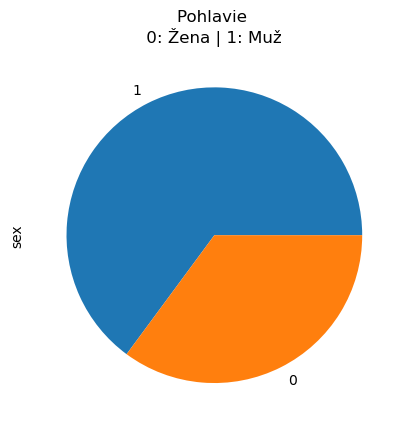

In [12]:
#Exploračná analýza
#Rozdelenie pohlaví
data['sex'].value_counts().plot(kind = 'pie', title='Pohlavie \n 0: Žena | 1: Muž ')

In [13]:
(data['sex'].value_counts()/sum(data['sex'].value_counts()))*100

1    64.882943
0    35.117057
Name: sex, dtype: float64

In [14]:
#Z rozdelenia pohlaví vidíme, že väčšinové zastúpenie v tomto datasete majú muži

<AxesSubplot:title={'center':'Úmrtia \n (0: Prežili | 1: Zomreli )'}, ylabel='DEATH_EVENT'>

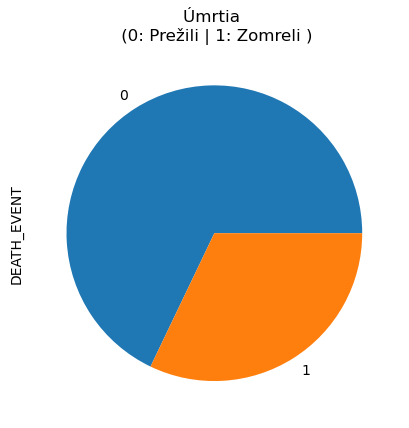

In [15]:
#Rozdelenie úmrtí
data['DEATH_EVENT'].value_counts().plot(kind='pie', title='Úmrtia \n (0: Prežili | 1: Zomreli )')

In [16]:
(data['DEATH_EVENT'].value_counts()/sum(data['DEATH_EVENT'].value_counts()))*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

In [17]:
#Z rozdelenia úmrtí môžeme dedukovať, že u väčšiny pacientov nenastala smrť

<AxesSubplot:title={'center':'Fajčenie \n (0: Nefajčiar | 1: Fajčiar )'}, ylabel='smoking'>

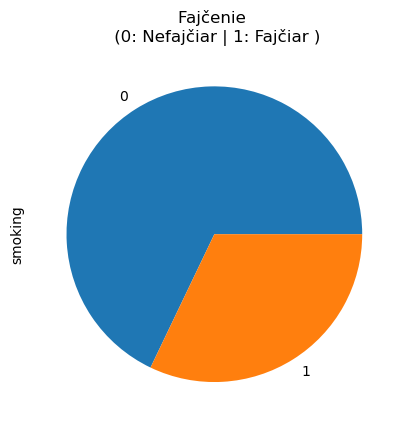

In [18]:
#Rozdelenie fajčiarov
data['smoking'].value_counts().plot(kind = 'pie', title = 'Fajčenie \n (0: Nefajčiar | 1: Fajčiar )')

In [19]:
(data['smoking'].value_counts()/sum(data['smoking'].value_counts()))*100

0    67.892977
1    32.107023
Name: smoking, dtype: float64

In [20]:
#Z rozdelenia fajčiarov usudzujeme, že väčšina pacientov nefajčila

<AxesSubplot:title={'center':'Cukrovka \n (0: Nemá cukrovku | 1: Má cukrovku )'}, ylabel='diabetes'>

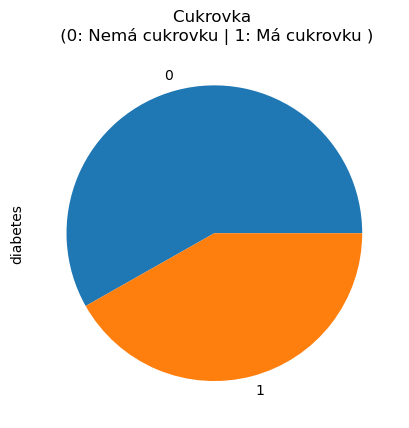

In [21]:
#Rozdelenie pacientov s cukrovkou
data['diabetes'].value_counts().plot(kind= 'pie', title = 'Cukrovka \n (0: Nemá cukrovku | 1: Má cukrovku )')

In [22]:
(data['diabetes'].value_counts()/sum(data['diabetes'].value_counts()))*100

0    58.19398
1    41.80602
Name: diabetes, dtype: float64

In [23]:
#Z grafu vyššie vieme povedať, že väčšina z pacientov netrpí cukrovkou

<AxesSubplot:title={'center':'Vysoký krvný tlak - VKT \n (0: Má VKT | 1: Nemá VKT )'}, ylabel='high_blood_pressure'>

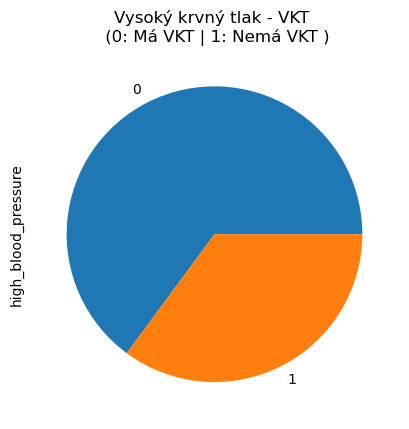

In [24]:
#Rozdelenie pacientov s vysokým krvným tlakom
data['high_blood_pressure'].value_counts().plot(kind = 'pie', title= 'Vysoký krvný tlak - VKT \n (0: Má VKT | 1: Nemá VKT )')

In [25]:
(data['high_blood_pressure'].value_counts()/sum(data['high_blood_pressure'].value_counts()))*100

0    64.882943
1    35.117057
Name: high_blood_pressure, dtype: float64

In [26]:
#Podľa grafu rozdelenia vidíme, že väčšina pacientov nemá problém s vysokým krvným tlakom

<AxesSubplot:xlabel='sex'>

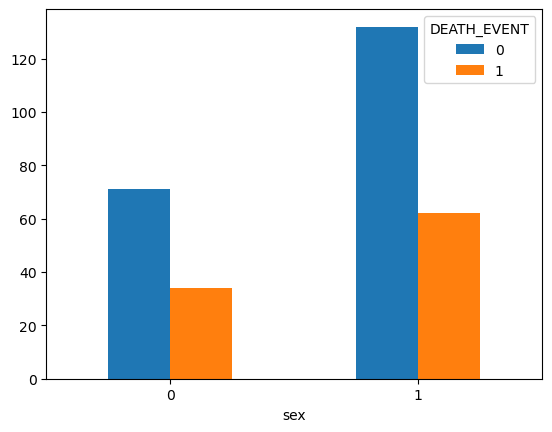

In [27]:
pd.crosstab(data['sex'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

<AxesSubplot:xlabel='anaemia'>

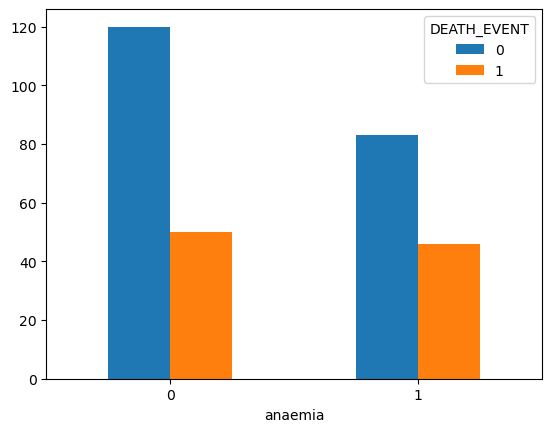

In [28]:
pd.crosstab(data['anaemia'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

<AxesSubplot:xlabel='diabetes'>

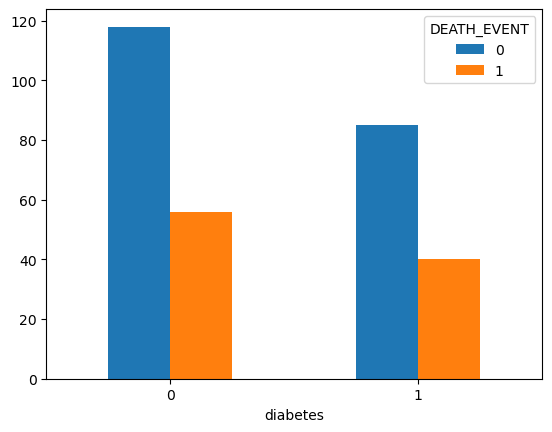

In [29]:
pd.crosstab(data['diabetes'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

<AxesSubplot:xlabel='high_blood_pressure'>

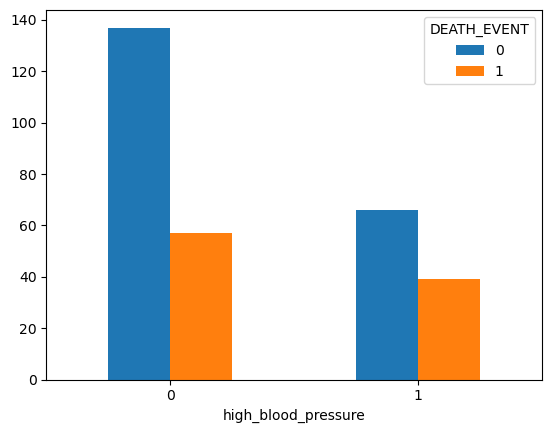

In [30]:
pd.crosstab(data['high_blood_pressure'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

<AxesSubplot:xlabel='smoking'>

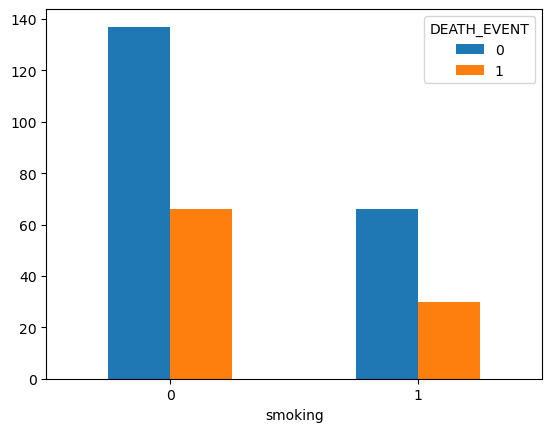

In [31]:
pd.crosstab(data['smoking'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

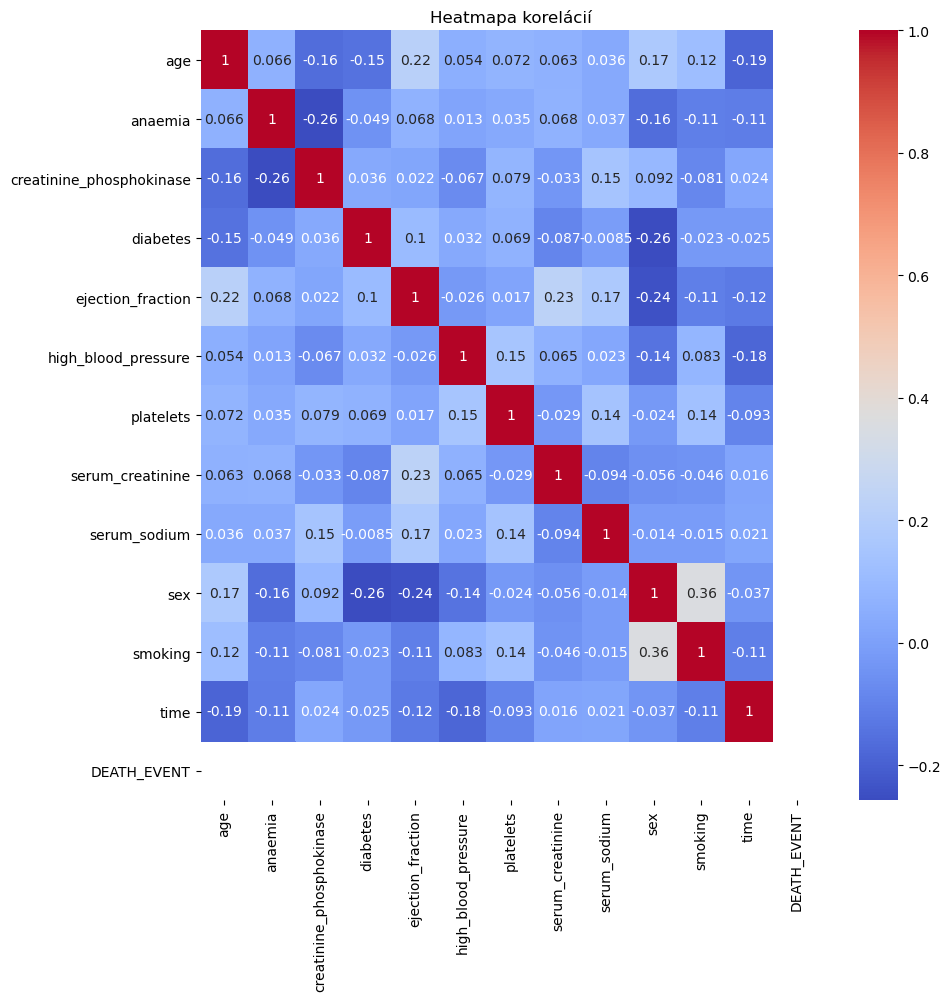

In [45]:
death = data[data['DEATH_EVENT'] == 1]
plt.figure(figsize=(10,10))
sns.heatmap(death.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmapa korelácií')
plt.show()

In [ ]:
#Test normálového rozloženia, overenie hypotézy pre smrti na kardiovaskulárne ochorenie
#Nulová hypotéza: dáta X sú z normálového rozloženia

In [54]:
def NormalTest(cols=nekategoricke, data=death):
    norma_attr = []
    for u in cols:
        k2, p = normaltest(data[u])  
        if p < 0.001:
            print(f'Pre {u}: Môžeme nulovú hypotézu zamietnuť. pvalue={p}')
        else:
            print(f'Pre {u}: Nemôžeme zamietnuť nulovú hypotézu. pvalue={p}')
            norma_attr.append(u)
            
    print(f'\n Atribúty, ktoré su z normálového rozloženia: {norma_attr}.')
    return norma_attr

In [55]:
normal_cols = NormalTest()

Pre creatinine_phosphokinase: Môžeme nulovú hypotézu zamietnuť. pvalue=1.06758875232229e-25
Pre platelets: Nemôžeme zamietnuť nulovú hypotézu. pvalue=0.004876523292516175
Pre ejection_fraction: Nemôžeme zamietnuť nulovú hypotézu. pvalue=0.0066182733411390155
Pre serum_sodium: Môžeme nulovú hypotézu zamietnuť. pvalue=0.00072544971629459
Pre serum_creatinine: Môžeme nulovú hypotézu zamietnuť. pvalue=2.714886158316834e-21
Pre time: Môžeme nulovú hypotézu zamietnuť. pvalue=0.000620382184129301
Pre age: Nemôžeme zamietnuť nulovú hypotézu. pvalue=0.10803960470838643

 Atribúty, ktoré su z normálového rozloženia: ['platelets', 'ejection_fraction', 'age'].


In [ ]:
#Pre výsledné atribúty dát: krvné doštičky, ejekčná frakcia a vek budeme skúmať ktoré zapríčiňujú smrť

In [35]:
#XGBoost, Random Forest